In [3]:
# 中間レポート　第１問 主計算 (以下piを使わない別解あり)
# written in python
import numpy as np
import sys
import math
import time
start_time = time.process_time()
def num_count(count): # using pointer 　passing technique 
    d=1
    ell=0.5
    rand = np.random.rand(2)
    
    if(d*rand[0]<ell*np.cos(0.5*math.pi*rand[1])):
        count[0]+=1
    #return count

### main #####
count=[0]
n=0
out=100
f = open("buffon.dat", 'w')
while n < 1e8:
    n+=1
    num_count(count)
    if(n>out):
        print("n={:e} pi={:.16f} err={:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        f.write("{:e} {:.16f} {:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        out*=1.2
f.close()
end_time = time.process_time()
elapsed_time = end_time - start_time
print(elapsed_time)

n=1.010000e+02 pi=3.2580645161290325 err=0.1164718625392394

n=1.210000e+02 pi=3.3611111111111112 err=0.2195184575213180

n=1.450000e+02 pi=3.2954545454545454 err=0.1538618918647523

n=1.730000e+02 pi=3.3269230769230771 err=0.1853304233332840

n=2.080000e+02 pi=3.3548387096774195 err=0.2132460560876264

n=2.490000e+02 pi=3.1923076923076925 err=0.0507150387178994

n=2.990000e+02 pi=3.2150537634408600 err=0.0734611098510669

n=3.590000e+02 pi=3.2935779816513762 err=0.1519853280615830

n=4.300000e+02 pi=3.3076923076923075 err=0.1660996541025144

n=5.160000e+02 pi=3.3076923076923075 err=0.1660996541025144

n=6.200000e+02 pi=3.2978723404255321 err=0.1562796868357390

n=7.440000e+02 pi=3.0617283950617282 err=0.0798642585280649

n=8.920000e+02 pi=3.0758620689655172 err=0.0657305846242759

n=1.070000e+03 pi=3.1656804733727810 err=0.0240878197829879

n=1.284000e+03 pi=3.1703703703703705 err=0.0287777167805774

n=1.541000e+03 pi=3.2037422037422036 err=0.0621495501524105

n=1.849000e+03 pi=3.2325

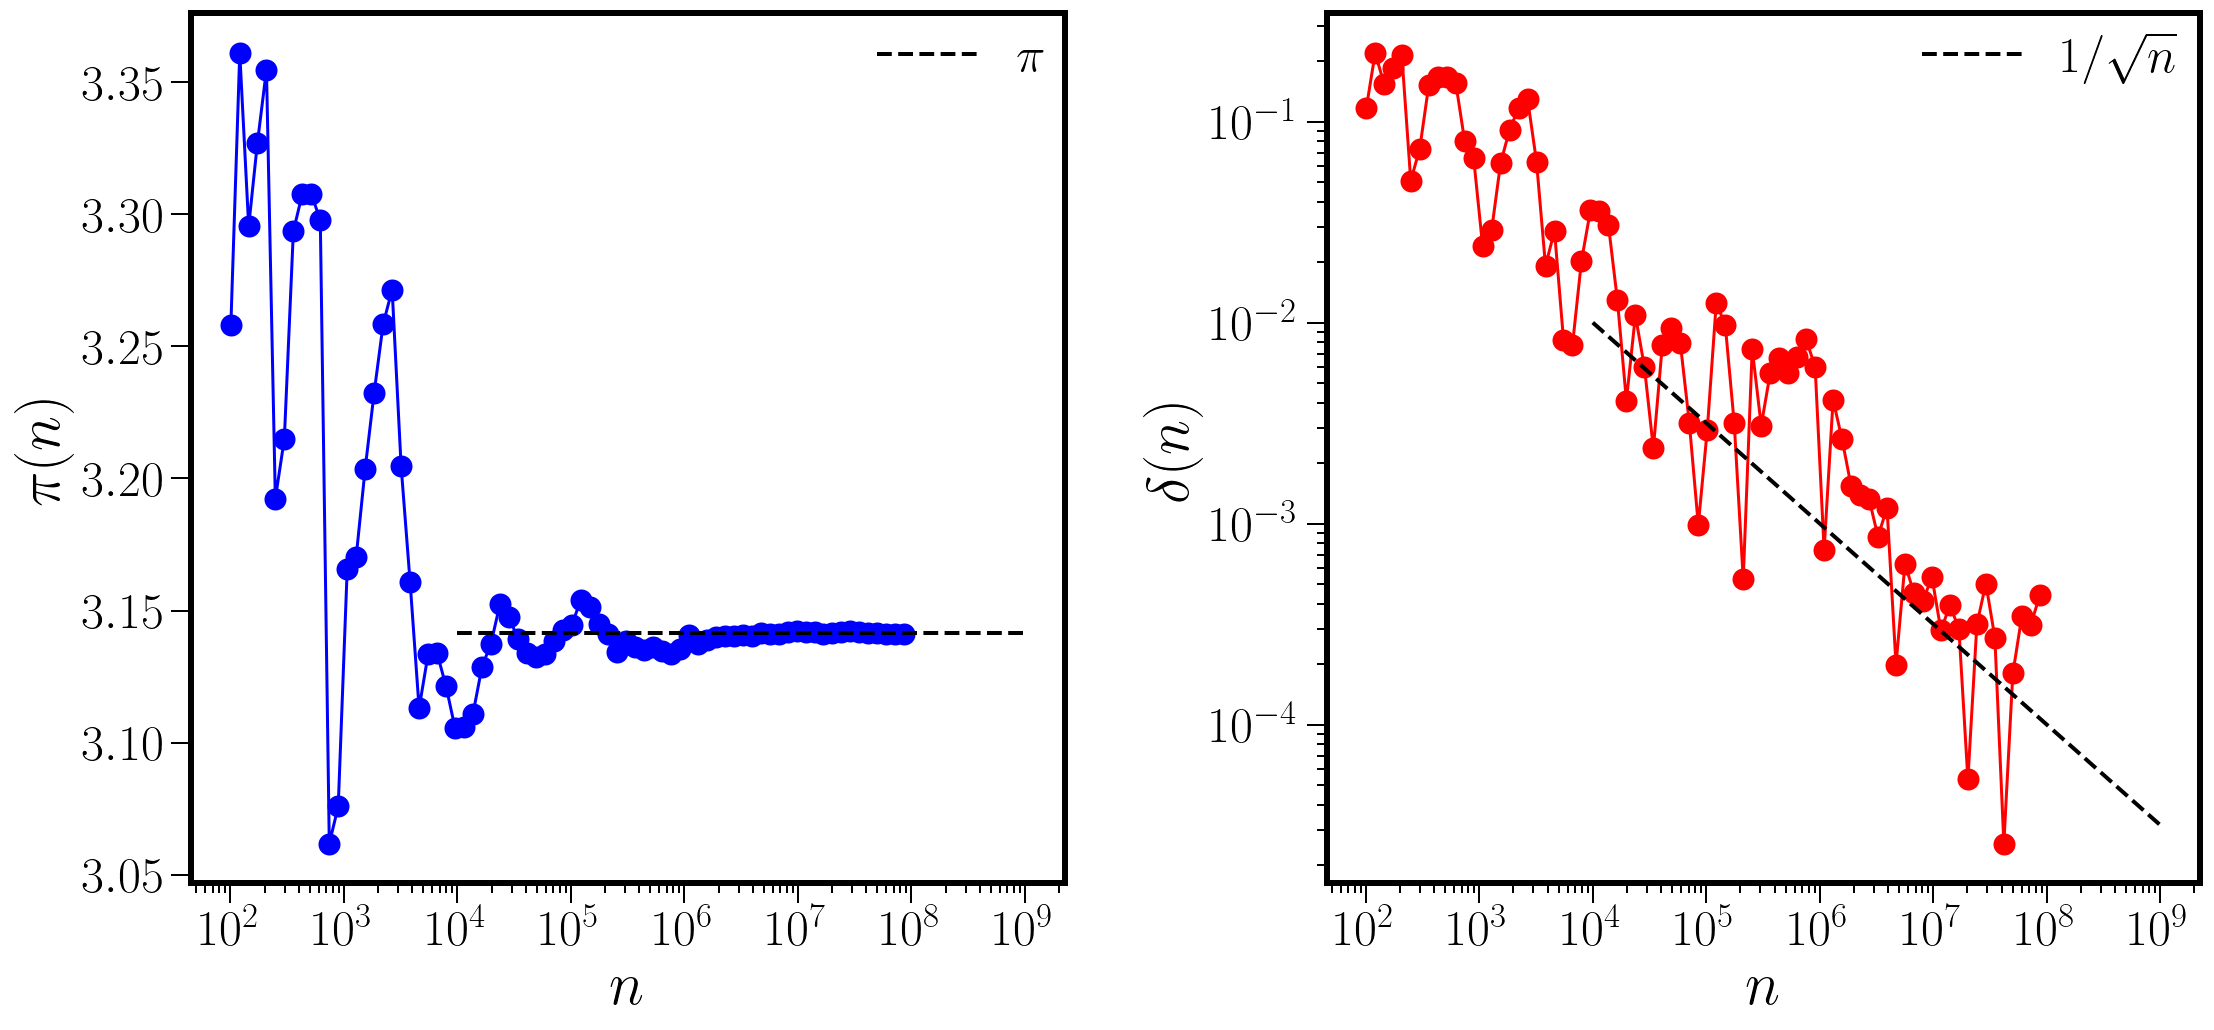

In [4]:
#第１問作図
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
plt.rcParams["text.usetex"] =True 
fig = plt.figure(figsize=(18,8))

for j in range(1,3):
    ax1 = fig.add_subplot("12{}".format(j))
    i, pi,error  = np.loadtxt("./buffon.dat", comments='#', unpack=True)
  
    plt.xscale('log')
    ###Drawing a line ######
    x= np.linspace(1e4, 1e9, 100) 
    if(j==1):
        plt.plot(i, pi, "o-",markersize=10,color="b")
        y= np.pi+0*x
        plt.plot(x, y, "--",markersize=3,linewidth = 2.0, color="k",label=r"$\pi$")
        plt.ylabel(r"$\pi(n)$",color='k', size=30)

    else:
        plt.plot(i, error, "o-",markersize=10,color="r")
        y= 1/x**0.5
        plt.plot(x, y, "--",markersize=3,linewidth = 2.0, color="k",label=r"$1/\sqrt{n}$")  
        plt.ylabel(r"$\delta(n)$",color='k', size=30)
        plt.yscale('log')
   
    #########
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    ax1.spines['top'].set_linewidth(3)
    ax1.spines['bottom'].set_linewidth(3)
    ax1.spines['left'].set_linewidth(3)
    ax1.spines['right'].set_linewidth(3)
    plt.xlabel(r"$n$",color='k', size=30)
    plt.xticks(color='k', size=25)
    plt.yticks(color='k', size=25)
    plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
    #################################
    #図のマージン設定
    plt.subplots_adjust(wspace=0.3, hspace=0.25)

plt.savefig('./Dropbox/buffon_pi.png')
plt.savefig('./Dropbox/buffon_pi.pdf')

In [5]:
#中間レポート　第２問 主計算
import numpy as np
import sys

zeta=[10,2,1,0.1]
dt=[0.0001,0.001,0.01,0.1]

def damp_osci(dt,zeta):
    v=0.
    x=1.
    t=0.
    i=0
    out=0.
    f = open("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt,zeta), 'w')
    while i < (int)(50./dt): 
        v -= zeta*v*dt+x*dt
        x+=v*dt
        i+=1
        if(i*dt >=out):
            print("{:.4f} {:.20f} {:.20f}".format(i*dt,v,x))
            f.write("{:.4f} {:.20f} {:.20f}\n".format(i*dt,v,x))
            out+=0.5
    f.close()
for i in range(0,4):
    for j in range(0,4):
        print("dt={:.5f}".format(dt[i]))
        damp_osci(dt[i],zeta[j]) 

dt=0.00010
0.0001 -0.00010000000000000000 0.99999998999999994975
0.5000 -0.09631243425114699441 0.96046422530568131837
1.0000 -0.09224937279534854706 0.91322471918565339966
1.5000 -0.08771039005545933076 0.86824379555223696325
2.0000 -0.08339019831549542017 0.82547795089735787055
2.5000 -0.07928276632153954950 0.78481855913609466224
3.0000 -0.07537764801668221659 0.74616186910379567188
3.5000 -0.07166487856082770502 0.70940923659756727204
4.0000 -0.06813498370233937729 0.67446687616777312169
4.5000 -0.06477895584763644632 0.64124562182092581519
5.0000 -0.06158823107733308461 0.60966069948588608174
5.5000 -0.05855466729282533117 0.57963151068720530912
6.0000 -0.05567052343926410379 0.55108142687375627489
6.5000 -0.05292843975191362238 0.52393759387780847181
7.0000 -0.05032141897548814136 0.49813074600562345928
7.5000 -0.04784280850854070316 0.47359502928508823150
8.0000 -0.04548628342733807006 0.45026783341940318506
8.5000 -0.04324583034590827324 0.42808963201799138387
9.0000 -0.0411157

17.5000 -0.00009595334589067492 -0.00008687324104212667
18.0000 -0.00001694543723821351 -0.00011400641853264935
18.5000 0.00003423936835052022 -0.00010849475406864223
19.0000 0.00005868602396085356 -0.00008424555198443660
19.5000 0.00006220485251854599 -0.00005330441963301555
20.0000 0.00005235257239794333 -0.00002426669958824825
20.5000 0.00003628898330266319 -0.00000197882410950074
21.0000 0.00001955349690135157 0.00001192042533954836
21.5000 0.00000563532281219206 0.00001805354062373688
22.0000 -0.00000389215854747928 0.00001829456045091002
22.5000 -0.00000892072788233068 0.00001491548999815205
23.0000 -0.00001025166203403711 0.00000999190542269245
23.5000 -0.00000908346007501502 0.00000508029448810706
24.0000 -0.00000662459889094846 0.00000112238389255454
24.5000 -0.00000385674077587493 -0.00000149442689752718
25.0000 -0.00000143482098872719 -0.00000279359603859549
25.5000 0.00000031059234036277 -0.00000304325295501550
26.0000 0.00000130936327872762 -0.00000260825704519055
26.5000 

dt=0.10000
0.1000 -0.10000000000000000555 0.98999999999999999112
0.5000 -0.39252284100000001121 0.87163402589999994241
1.0000 -0.54560576568103102968 0.62107911247060176851
1.5000 -0.52660983511753944875 0.34860723451516073546
2.0000 -0.40981160302608993229 0.11782217755732461717
2.5000 -0.25867926004866237388 -0.04207655426051302994
3.0000 -0.11757386997935051487 -0.12805912264196164796
3.5000 -0.01067986847086087668 -0.15315607514612825102
4.0000 0.05458120406374859096 -0.13726892945298249660
4.5000 0.08217409245059488498 -0.10036633725421320595
5.0000 0.08199212746440497079 -0.05845302720295326299
5.5000 0.06544587192589262914 -0.02198424289618623739
6.0000 0.04255406668208049775 0.00395788548009987692
6.5000 0.02050491317237911407 0.01848292649020892228
7.0000 0.00337402710764726776 0.02335412972266706980
7.5000 -0.00741805695180374619 0.02154819854687339831
8.0000 -0.01230340984682737338 0.01616156193982416778
8.5000 -0.01272142041634744848 0.00974053485008350220
9.0000 -0.0104177

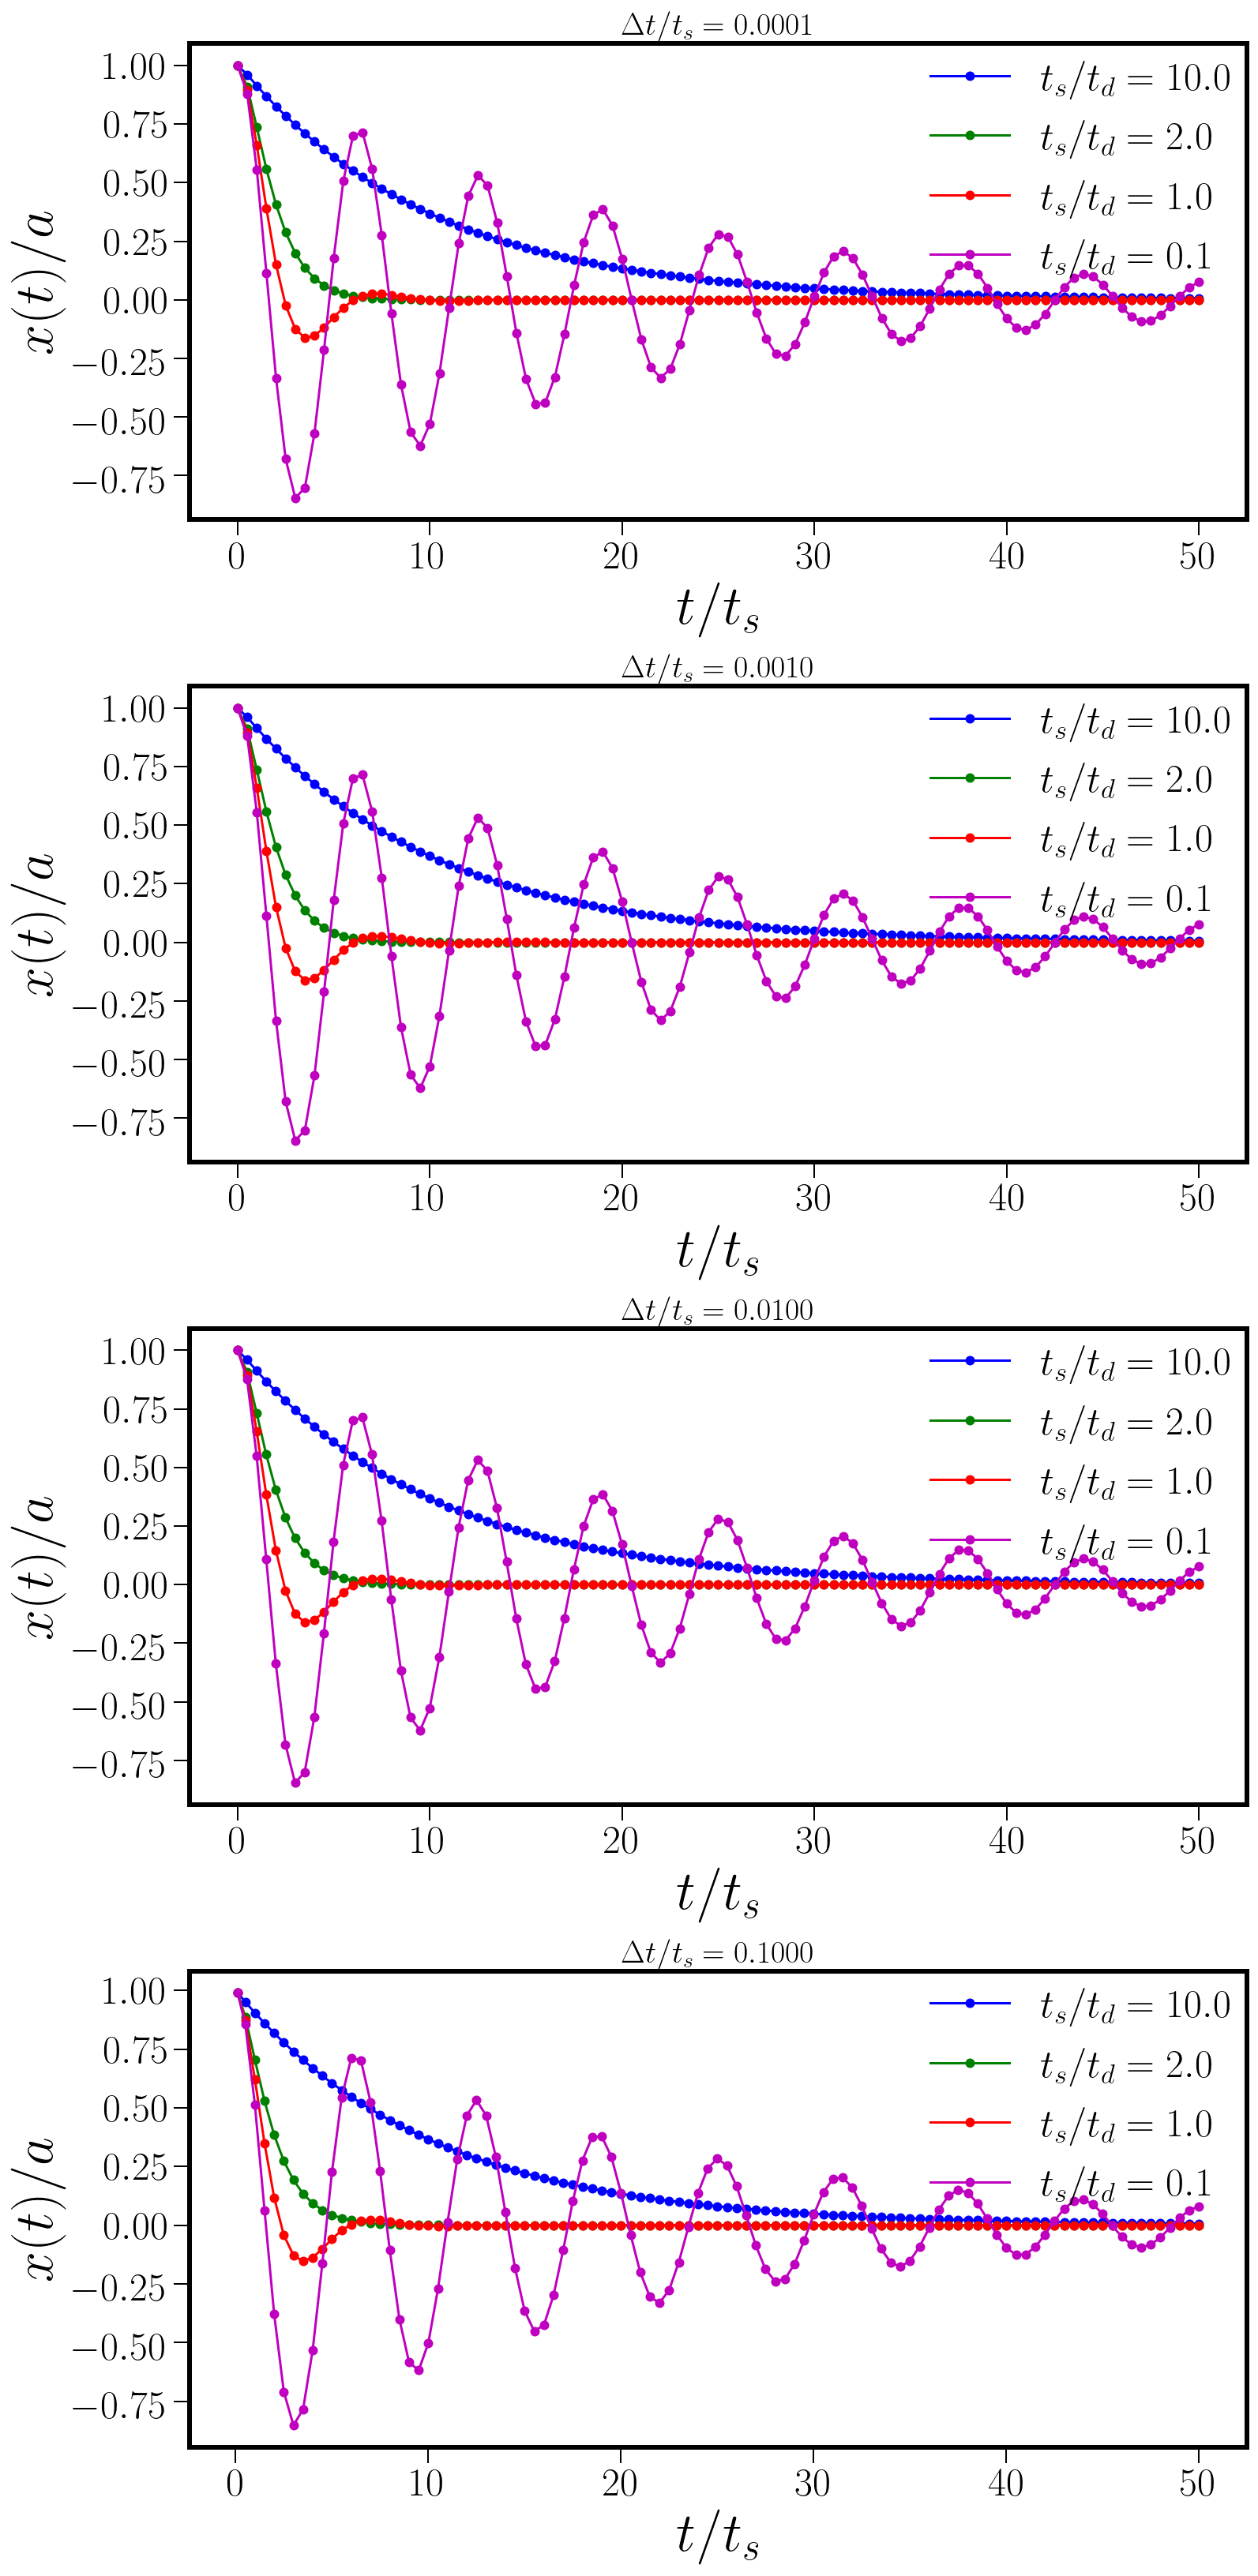

In [1]:
#中間レポート　第２問 作図
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
plt.rcParams["text.usetex"] =True 
fig = plt.figure(figsize=(12,28))

dt=[0.0001,0.001,0.01,0.1]
zeta=[10,2,1,0.1]

for j in range(1,5):
    ax1 = fig.add_subplot("41{}".format(j))
    t, v0,x0  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[0]), comments='#', unpack=True)
    t, v1,x1  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[1]), comments='#', unpack=True)
    t, v2,x2  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[2]), comments='#', unpack=True)
    t, v3,x3  = np.loadtxt("./Dropbox/damp_osci_dt{:.4f}_zeta{:.1f}.dat".format(dt[j-1],zeta[3]), comments='#', unpack=True)
    plt.title("$\Delta t/t_s ={:.4f}$".format(dt[j-1]),size=20)
    plt.plot(t, x0, "o-",markersize=5,color="b",label=r"$t_s/t_d={:.1f}$".format(zeta[0]))
    plt.plot(t, x1, "o-",markersize=5,color="g",label=r"$t_s/t_d={:.1f}$".format(zeta[1]))
    plt.plot(t, x2, "o-",markersize=5,color="r",label=r"$t_s/t_d={:.1f}$".format(zeta[2]))
    plt.plot(t, x3, "o-",markersize=5,color="m",label=r"$t_s/t_d={:.1f}$".format(zeta[3]))

    #########
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    ax1.spines['top'].set_linewidth(3)
    ax1.spines['bottom'].set_linewidth(3)
    ax1.spines['left'].set_linewidth(3)
    ax1.spines['right'].set_linewidth(3)
    plt.ylabel(r"$x(t)/a$",color='k', size=35)
    plt.xlabel(r"$t/t_s$",color='k', size=35)
    plt.xticks(color='k', size=25)
    plt.yticks(color='k', size=25)
    plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=25,frameon=False)
    #################################
    #図のマージン設定
    plt.subplots_adjust(wspace=0.3, hspace=0.35)

plt.savefig('./Dropbox/damp_osci.png')
plt.savefig('./Dropbox/damp_osci.pdf')

In [6]:
# 中間レポート　第１問 主計算　（別解）
# written in python
import numpy as np
import sys
import math
import time

def num_count(count): # using pointer 　passing technique 
    d=1
    ell=0.5
    u1=1.5
    while u1>1:
        rand = np.random.rand(2)
        u1= rand[0]*rand[0]+rand[1]*rand[1]
        
    if(d*u1<ell*rand[1]/math.sqrt(u1)):
        count[0]+=1
    #return count

    ### main #####
count=[0]
n=0
out=100
f = open("buffon.dat", 'w')
start_time = time.process_time()
for n in range (0,(int)(1e8)):
    num_count(count)
    if(n>out):
        print("n={:e} pi={:.16f} err={:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        f.write("{:e} {:.16f} {:.16f}\n".format(n,n/count[0],abs(n/count[0]-math.pi)))
        out*=1.2

f.close()
end_time = time.process_time()
elapsed_time = end_time - start_time
print(elapsed_time)

n=1.010000e+02 pi=4.2083333333333330 err=1.0667406797435399

n=1.210000e+02 pi=4.3214285714285712 err=1.1798359178387781

n=1.450000e+02 pi=4.1428571428571432 err=1.0012644892673501

n=1.730000e+02 pi=3.9318181818181817 err=0.7902255282283885

n=2.080000e+02 pi=3.5254237288135593 err=0.3838310752237661

n=2.490000e+02 pi=3.5571428571428569 err=0.4155502035530638

n=2.990000e+02 pi=3.6913580246913580 err=0.5497653711015649

n=3.590000e+02 pi=3.5899999999999999 err=0.4484073464102067

n=4.300000e+02 pi=3.4677419354838710 err=0.3261492818940779

n=5.160000e+02 pi=3.2866242038216562 err=0.1450315502318631

n=6.200000e+02 pi=3.2804232804232805 err=0.1388306268334873

n=7.440000e+02 pi=3.3214285714285716 err=0.1798359178387785

n=8.920000e+02 pi=3.2318840579710146 err=0.0902914043812215

n=1.070000e+03 pi=3.1195335276967930 err=0.0220591258930001

n=1.284000e+03 pi=3.1165048543689320 err=0.0250877992208611

n=1.541000e+03 pi=3.0454545454545454 err=0.0961381081352477

n=1.849000e+03 pi=2.9822